In [1]:
import pandas as pd
from pylab import *
df = pd.read_pickle('data/paths.pkl.xz')
df
img = imread('data/paths0.png')
def draw_lines(args,multipul = True):
    
    for i,tuple in enumerate(args):
        if multipul or i==0:
            plt.figure(i+1)
            fig, ax = plt.subplots()
            ax.imshow(img)
        plot(*tuple, '-', 'color',rand(1,3))

# filter by area

In [3]:
def filter_by_area(t_l,b_r):
    df_by_obj = df.set_index(['filename', 'obj']).sort_index()
    temp1 = df_by_obj
    temp2=temp1[(temp1.x.between(t_l[0],b_r[0]))&(temp1.y.between(t_l[1],b_r[1]))]
    temp3=temp2[['x','y']]
    
    top10 = temp3.groupby(["filename","obj"]).size().sort_values(ascending=False)
    df_by_obj = df.set_index(['filename', 'obj']).sort_index()
    main_info = []
    for t in top10.index:
        oo = df_by_obj.loc[t]
        main_info.append((oo.x,oo.y))
    draw_lines(main_info,multipul = False)


    
t_l=(0,0)
b_r=(600,300)

#filter_by_area(t_l,b_r)

# filter by definitioned area

<Figure size 432x288 with 0 Axes>

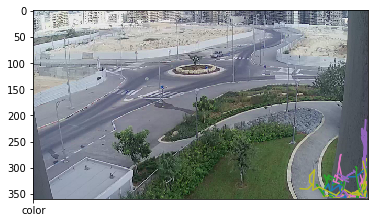

In [4]:
num_square=(9,9)
num_of_squares=(10,10)
def filter_by_definitioned_area(num_square, num_of_squares):
    y=img.shape[0]
    x=img.shape[1]
    x_size=x//num_of_squares[0]
    y_size=y//num_of_squares[1]
    p1=(x_size*num_square[0],y_size*(num_square[1]))
    p2=(x_size*(num_square[0]+1),y_size*(num_square[1]+1))
    filter_by_area(p1,p2)
filter_by_definitioned_area(num_square, num_of_squares)